In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

### Description of data set 
*  name :contains the name of the restaurant
*  online_order :whether online ordering is available in the restaurant or not
* book_table : table book option available or not
* rate: contains the overall rating of the restaurant out of 5
*  votes: contains total number of rating for the restaurant as of the above mentioned date
* location: contains the neighborhood in which the restaurant is located
* rest_type: restaurant type

In [2]:
df_1 = pd.read_csv("zomato.csv")

In [3]:
df_1.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Dropping Unwanted Variables

In [4]:
col_to_remove = ['url','address','phone','reviews_list','menu_item']
df = df_1.drop(columns=col_to_remove)


# Duplicate Values 

In [5]:
##### Remove duplicate values 
df.drop_duplicates(inplace=True)

# Train Test Split

In [6]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
X= df.drop(columns=['approx_cost(for two people)'])
Y = df['approx_cost(for two people)']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2)

x_train['approx_cost(for two people)'] = y_train
df = x_train

## Changing Variable Structures

In [8]:
#changing the type of "approx_cost(for two people)"
#removing the ',' sign and making it numeric
def fun(x):
    x_new = x.split(',')
    return x_new[0]+x_new[1]
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: fun(x) if ',' in str(x) else x)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'])

In [9]:
df.head(4)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,listed_in(type),listed_in(city),approx_cost(for two people)
28549,Shree Thali,No,No,4.1 /5,183,Koramangala 5th Block,Mess,"Veg Thali, Paratha, Kadhi, Shrikhand, Buttermi...",North Indian,Dine-out,Koramangala 4th Block,150.0
18402,Nandini Andhra Style Mess,No,No,3.5/5,28,Old Airport Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",Delivery,Indiranagar,350.0
2885,Vinaya Cafe,Yes,No,3.4/5,11,Jayanagar,Quick Bites,NaN,"South Indian, Street Food, Juices",Delivery,Basavanagudi,200.0
14632,Mudpipe Cafe,Yes,No,4.2/5,740,Cunningham Road,Cafe,"Sandwiches, Lemonade, Nachos, Mozzarella Stick...","Cafe, Continental, Italian, Burger",Cafes,Frazer Town,750.0


In [10]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'listed_in(type)',
       'listed_in(city)', 'approx_cost(for two people)'],
      dtype='object')

In [11]:
#changing the structure of "rate"
#removing "/5" part
df['rate'].unique()


array(['4.1 /5', '3.5/5', '3.4/5', '4.2/5', '3.4 /5', '3.8 /5', '3.9/5',
       '2.9/5', nan, '3.9 /5', '4.3 /5', '4.2 /5', '4.6 /5', '3.2/5',
       '3.0 /5', '3.1/5', '3.1 /5', '4.0 /5', '3.5 /5', '3.7 /5', '4.1/5',
       '4.0/5', '3.7/5', 'NEW', '3.6/5', '3.8/5', '4.4 /5', '2.6/5',
       '3.3/5', '4.5 /5', '2.8/5', '3.3 /5', '2.9 /5', '3.6 /5', '4.3/5',
       '4.4/5', '4.5/5', '3.2 /5', '2.8 /5', '4.9 /5', '4.6/5', '2.7/5',
       '2.1/5', '3.0/5', '2.7 /5', '-', '2.5/5', '2.6 /5', '4.9/5',
       '2.2/5', '4.8/5', '4.7/5', '4.7 /5', '4.8 /5', '2.3/5', '2.4/5',
       '2.4 /5', '2.3 /5', '2.5 /5', '2.2 /5', '1.8 /5', '2.0 /5',
       '2.1 /5', '2.0/5', '1.8/5'], dtype=object)

In [12]:
df['rate'] = df['rate'].apply(lambda x : str(x).split('/')[0])
df['rate'].unique()


array(['4.1 ', '3.5', '3.4', '4.2', '3.4 ', '3.8 ', '3.9', '2.9', 'nan',
       '3.9 ', '4.3 ', '4.2 ', '4.6 ', '3.2', '3.0 ', '3.1', '3.1 ',
       '4.0 ', '3.5 ', '3.7 ', '4.1', '4.0', '3.7', 'NEW', '3.6', '3.8',
       '4.4 ', '2.6', '3.3', '4.5 ', '2.8', '3.3 ', '2.9 ', '3.6 ', '4.3',
       '4.4', '4.5', '3.2 ', '2.8 ', '4.9 ', '4.6', '2.7', '2.1', '3.0',
       '2.7 ', '-', '2.5', '2.6 ', '4.9', '2.2', '4.8', '4.7', '4.7 ',
       '4.8 ', '2.3', '2.4', '2.4 ', '2.3 ', '2.5 ', '2.2 ', '1.8 ',
       '2.0 ', '2.1 ', '2.0', '1.8'], dtype=object)

# Missing values 

In [13]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          17
rest_type                        185
dish_liked                     22370
cuisines                          36
listed_in(type)                    0
listed_in(city)                    0
approx_cost(for two people)      278
dtype: int64

### rate

In [14]:
# handling the missing values of 'rate'
# missing values are in the forms of 'NEW', '-' and 'nan'!!!
# finally converting values to numeric form

In [15]:
ls = [float(i) for i in df['rate'] if (i!='NEW') & (i!='nan') & (i!='-')]
mean_rate = round(np.mean(ls),1)

df['rate'] = df['rate'].apply(lambda x: mean_rate if (x=='NEW') | (x=='-') | (x=='nan') else x)

In [16]:
df['rate'].unique()

array(['4.1 ', '3.5', '3.4', '4.2', '3.4 ', '3.8 ', '3.9', '2.9', 3.7,
       '3.9 ', '4.3 ', '4.2 ', '4.6 ', '3.2', '3.0 ', '3.1', '3.1 ',
       '4.0 ', '3.5 ', '3.7 ', '4.1', '4.0', '3.7', '3.6', '3.8', '4.4 ',
       '2.6', '3.3', '4.5 ', '2.8', '3.3 ', '2.9 ', '3.6 ', '4.3', '4.4',
       '4.5', '3.2 ', '2.8 ', '4.9 ', '4.6', '2.7', '2.1', '3.0', '2.7 ',
       '2.5', '2.6 ', '4.9', '2.2', '4.8', '4.7', '4.7 ', '4.8 ', '2.3',
       '2.4', '2.4 ', '2.3 ', '2.5 ', '2.2 ', '1.8 ', '2.0 ', '2.1 ',
       '2.0', '1.8'], dtype=object)

In [17]:
df['rate'] = pd.to_numeric(df['rate'])

In [18]:
df['rate'].unique()

array([4.1, 3.5, 3.4, 4.2, 3.8, 3.9, 2.9, 3.7, 4.3, 4.6, 3.2, 3. , 3.1,
       4. , 3.6, 4.4, 2.6, 3.3, 4.5, 2.8, 4.9, 2.7, 2.1, 2.5, 2.2, 4.8,
       4.7, 2.3, 2.4, 1.8, 2. ])

### name

In [19]:
df["name"].unique()

array(['Shree Thali', 'Nandini Andhra Style Mess', 'Vinaya Cafe', ...,
       'The Timber Times Cafe', 'Shivas Family Restaurant', 'Lashiwalla'],
      dtype=object)

In [20]:
'nan' in df['name'].unique()
# name (no missing values)

False

### online_order

In [21]:
df['online_order'].unique()
 # online_order (no missing values)

array(['No', 'Yes'], dtype=object)

### book_table

In [22]:
df['book_table'].unique()
# book_table (no missing values)

array(['No', 'Yes'], dtype=object)

### votes

In [23]:
df['votes'].unique()

array([ 183,   28,   11, ..., 2350, 4912, 2055], dtype=int64)

In [24]:
df['votes'].isna().sum()
# votes (no missing values)

0

### location

In [25]:
df['location'].unique()
# location (there are missing values)

array(['Koramangala 5th Block', 'Old Airport Road', 'Jayanagar',
       'Cunningham Road', 'Frazer Town', 'Richmond Road', 'HSR',
       'JP Nagar', 'Rajajinagar', 'Hennur', 'Indiranagar', 'Ulsoor',
       'Marathahalli', 'Bommanahalli', 'BTM', 'Koramangala 1st Block',
       'Sarjapur Road', 'Ejipura', 'Kalyan Nagar', 'Bannerghatta Road',
       'MG Road', 'Electronic City', 'Commercial Street', 'Kammanahalli',
       'Whitefield', 'Residency Road', 'Malleshwaram',
       'Koramangala 6th Block', 'Wilson Garden', 'Banaswadi',
       'Shanti Nagar', 'Lavelle Road', 'Domlur', 'Seshadripuram',
       'Vasanth Nagar', 'New BEL Road', 'Koramangala 4th Block',
       'Brigade Road', 'Bellandur', 'Banashankari', 'RT Nagar', nan,
       'Brookefield', 'Shivajinagar', 'Koramangala 7th Block',
       'Basaveshwara Nagar', 'Magadi Road', 'Infantry Road',
       'Sankey Road', 'Majestic', 'ITPL Main Road, Whitefield',
       'Koramangala 8th Block', 'Koramangala 3rd Block',
       'Race Course Ro

In [26]:
# handle the missing values of location
mode_value = df['location'].mode()[0]

# Impute missing values with the mode
df['location'].fillna(mode_value, inplace=True)

In [27]:
'nan' in df['location'].unique()


False

### rest_type

In [28]:
#rest_type (there are missing values)
df['rest_type'].unique()

array(['Mess', 'Quick Bites', 'Cafe', 'Bakery', 'Casual Dining',
       'Fine Dining', 'Microbrewery, Pub', 'Delivery',
       'Bar, Casual Dining', 'Beverage Shop', 'Food Court',
       'Dessert Parlor', 'Sweet Shop', 'Casual Dining, Bar',
       'Bakery, Dessert Parlor', 'Sweet Shop, Quick Bites',
       'Takeaway, Delivery', 'Beverage Shop, Quick Bites',
       'Casual Dining, Pub', 'Bakery, Cafe', 'Pub', 'Dhaba',
       'Casual Dining, Cafe', 'Bar', 'Lounge', 'Cafe, Bakery',
       'Cafe, Quick Bites', 'Bakery, Quick Bites', nan,
       'Pub, Casual Dining', 'Lounge, Casual Dining',
       'Cafe, Dessert Parlor', 'Microbrewery', 'Fine Dining, Bar',
       'Quick Bites, Beverage Shop', 'Quick Bites, Sweet Shop',
       'Confectionery', 'Casual Dining, Irani Cafee',
       'Dessert Parlor, Quick Bites', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Pub, Microbrewery', 'Takeaway',
       'Food Court, Dessert Parlor', 'Microbrewery, Casual Dining',
       'Bar, Quick Bites', 'Be

In [29]:
# handle the missing values of rest_type
mode_value = df['rest_type'].mode()[0]

# Impute missing values with the mode
df['rest_type'].fillna(mode_value, inplace=True)

In [30]:
'nan' in df['rest_type'].unique()

False

### dish_liked

In [31]:
df["dish_liked"].isnull().sum()

22370

In [32]:
mode_value = df['dish_liked'].mode()[0]

# Impute missing values with the mode
df['dish_liked'].fillna(mode_value, inplace=True)

In [33]:
df["dish_liked"].isnull().sum()
# dish_liked (no missing values)

0

### cuisines


In [34]:
# cuisines (There are missing values )
df['cuisines'].unique()


array(['North Indian', 'North Indian, Chinese, South Indian',
       'South Indian, Street Food, Juices', ...,
       'Chinese, Thai, Seafood, Malaysian',
       'Desserts, Beverages, Cafe, Ice Cream',
       'Salad, Fast Food, Sandwich, Healthy Food'], dtype=object)

In [35]:
df['cuisines'].isna().sum()

36

In [36]:
mode_value = df['cuisines'].mode()[0]

# Impute missing values with the mode
df['cuisines'].fillna(mode_value, inplace=True)

In [37]:
'nan' in df['cuisines'].unique()

False

### approx_cost(for two people)

In [38]:
# approx_cost(for two people)  : (there are missing values )
df['approx_cost(for two people)'].unique()

array([ 150.,  350.,  200.,  750., 1200.,  800.,  400.,  600.,  300.,
        450., 2800., 1300., 1400.,  250.,  500., 1500.,  700.,  900.,
       1100.,  550.,   nan, 1000., 1800., 4000., 1700.,  100., 2600.,
       2000., 3000., 5000., 1600.,  850.,  950.,  650., 2200., 2300.,
       1350., 2500., 2100., 1900.,   70., 2400.,  120., 1250.,   80.,
       4100.,  199., 3500.,   40.,  130., 1050., 3400.,  230., 3200.,
         50., 2700., 4500.,  180., 1650.,  330.,  240., 1450.,  360.,
       6000.,  190.,   60., 3700.])

#### Understanding the nature of the distribution of approx_cost(for two people) variable

<Axes: >

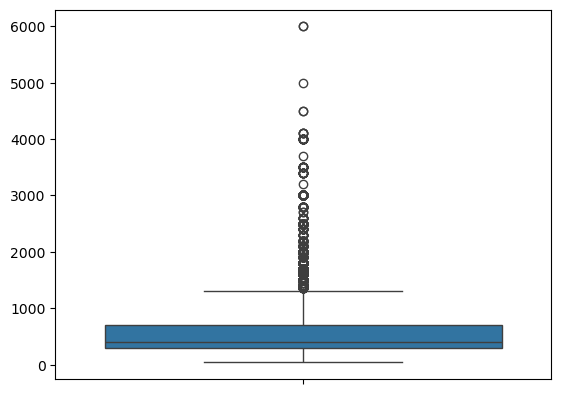

In [39]:
ls = [i for i in df['approx_cost(for two people)'] if i is not 'nan']
sns.boxplot(ls)

<Axes: ylabel='Count'>

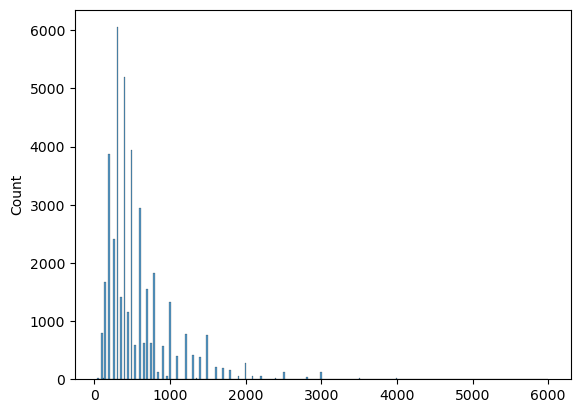

In [40]:
sns.histplot(ls)

In [41]:
(df['approx_cost(for two people)'].isna().sum()/df.shape[0])*100

0.6733354324605808

### Since missing value % is considerably low(0.6%) we can remove them , but it is better if we can analyze it to confirm the fact that it is completely random 

In [42]:
df.dropna(subset=['approx_cost(for two people)'], inplace=True)

In [43]:
df['approx_cost(for two people)'].isna().sum()

0

In [44]:
df.shape

(41009, 12)

### listed_in(type)

In [45]:
#listed_in(type)  (no missing values )
df['listed_in(type)'].unique()


array(['Dine-out', 'Delivery', 'Cafes', 'Buffet', 'Drinks & nightlife',
       'Desserts', 'Pubs and bars'], dtype=object)

### listed_in(city)

In [46]:
# listed_in(city)  (no missing values)
df['listed_in(city)'].unique()

array(['Koramangala 4th Block', 'Indiranagar', 'Basavanagudi',
       'Frazer Town', 'MG Road', 'Residency Road', 'JP Nagar',
       'Malleshwaram', 'Kammanahalli', 'BTM', 'Old Airport Road',
       'Koramangala 5th Block', 'Marathahalli', 'Jayanagar',
       'Sarjapur Road', 'Kalyan Nagar', 'Electronic City', 'Brookefield',
       'Brigade Road', 'Bannerghatta Road', 'Rajajinagar',
       'Koramangala 7th Block', 'HSR', 'Koramangala 6th Block',
       'Church Street', 'Lavelle Road', 'Whitefield', 'New BEL Road',
       'Bellandur', 'Banashankari'], dtype=object)

# Univariate Analysis

In [47]:
categorical_features = [col for col in df.columns if df[col].dtype=='object']
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [48]:
categorical_features

['name',
 'online_order',
 'book_table',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'listed_in(type)',
 'listed_in(city)']

In [49]:
numerical_features

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

## Summary Table

In [50]:
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (series < lower_bound) | (series > upper_bound)
    outlier_count = outliers.sum()
    outlier_percentage = outlier_count / len(series) * 100

    return outlier_count, outlier_percentage

# Create a summary table for numerical columns
summary_table = pd.DataFrame(index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'unique', 'outliers', 'outlier_percentage'])

for column in df.select_dtypes(include='number').columns:
    unique_values = df[column].nunique()
    outliers, outlier_percentage = calculate_outliers(df[column])

    summary_table[column] = [
        df[column].count(),
        df[column].mean(),
        df[column].std(),
        df[column].min(),
        df[column].quantile(0.25),
        df[column].median(),
        df[column].quantile(0.75),
        df[column].max(),
        unique_values,
        outliers,
        outlier_percentage
    ]

# Display the summary table
summary_table.T

,count,mean,std,min,25%,50%,75%,max,unique,outliers,outlier_percentage
rate,41009.0,3.700407,0.395926,1.8,3.5,3.7,3.9,4.9,31.0,2283.0,5.567071
votes,41009.0,284.589310,808.965886,0.0,7.0,41.0,198.0,16832.0,2201.0,5545.0,13.521422
approx_cost(for two people),41009.0,554.076861,437.002404,40.0,300.0,400.0,700.0,6000.0,66.0,2557.0,6.235217


## Distributions of Numerical Variables

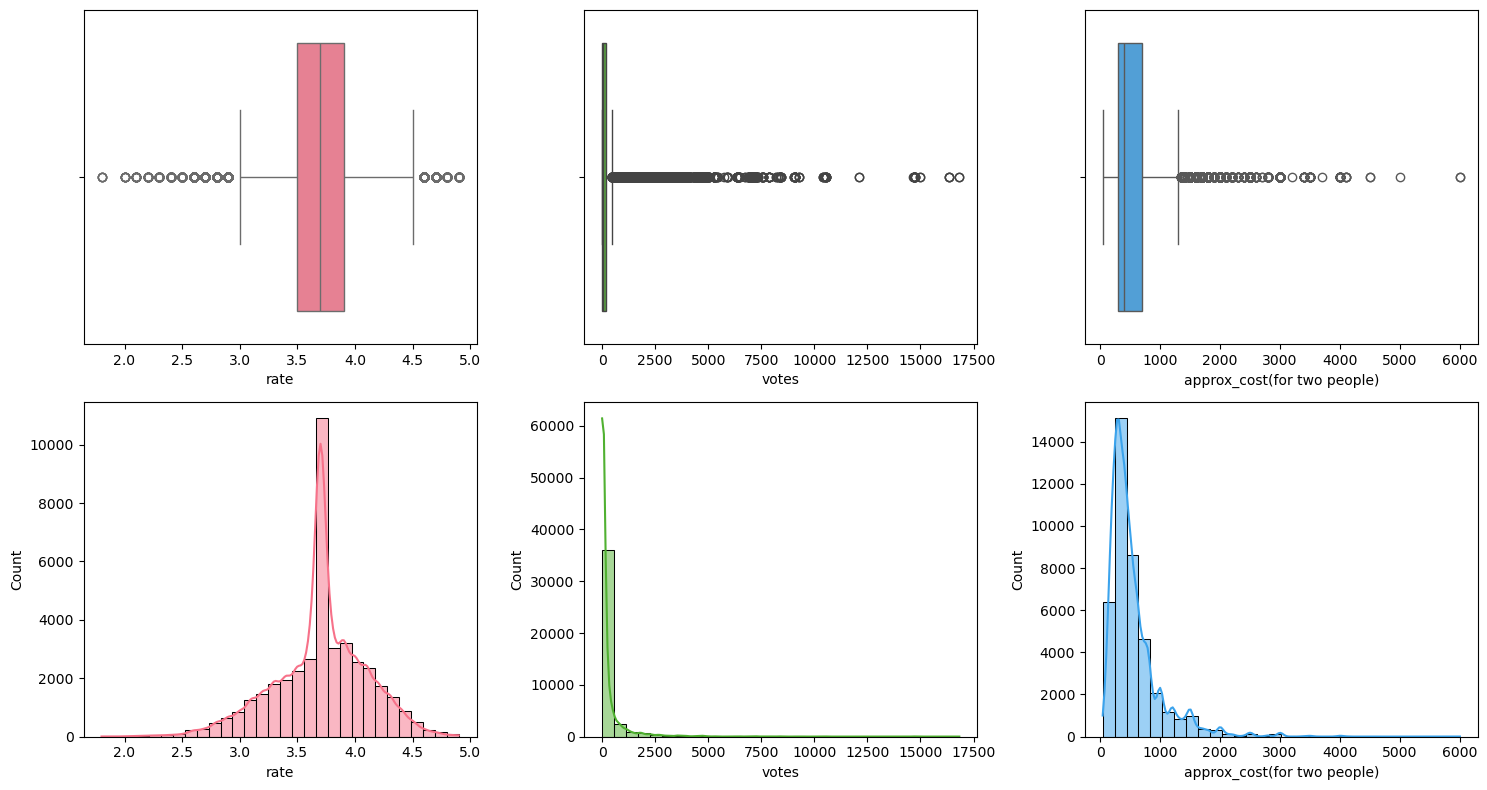

In [51]:
custom_palette = sns.color_palette("husl", n_colors=len(numerical_features))

# Create subplots for boxplots and density plots
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_features), figsize=(15, 8), sharex=False)

# Plot boxplots
for i, column in enumerate(numerical_features):
    sns.boxplot(x=df[column], ax=axes[0, i], palette=[custom_palette[i]])

# Plot density plots
for i, column in enumerate(numerical_features):
    sns.histplot(x=df[column], kde=True, ax=axes[1, i], color=custom_palette[i], bins=30)

# Adjust layout
plt.tight_layout()
plt.show()

## Correlation Heatmap

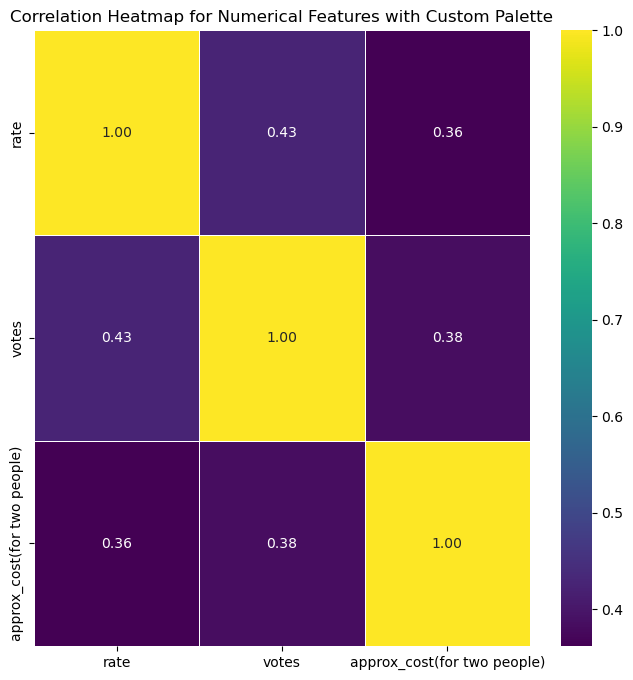

In [52]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Custom color palette
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Create a heatmap with custom palette
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap for Numerical Features with Custom Palette')
plt.show()

## Heatmap for Locations 


In [53]:
! pip install geopy

In [54]:
locations = pd.read_csv("zomato_locations.csv")
locations

,Name,count,lat,lon,avg_rating
0,BTM,5124,45.954851,-112.496595,4.1
1,HSR,2523,18.147500,41.538889,4.1
2,Koramangala 5th Block,2504,12.934377,77.628415,3.8
3,JP Nagar,2235,12.265594,76.646540,3.7
4,Whitefield,2144,44.373058,-71.611858,3.8
...,...,...,...,...,...
83,Kengeri,9,12.917657,77.483757,4.0
84,Nagarbhavi,9,12.954674,77.512172,4.4
85,Central Bangalore,8,13.010129,77.554801,3.5
86,Yelahanka,6,13.100698,77.596345,3.5


In [55]:
!pip install folium

In [56]:
import folium
from folium.plugins import HeatMap


In [57]:
def generatebasemap(default_location=[12.97,77.59],default_zoom_start=12):  # you can give any random value from our dataframe as default location
    basemap=folium.Map(location=default_location,zoom_start=default_zoom_start)
    return basemap

basemap=generatebasemap()


In [58]:
HeatMap(locations[["lat","lon","count"]],zoom=20).add_to(basemap)

In [59]:
basemap

* It is clear that restaurants tend to concentrate in central bangalore area.The cluster of restaurants gets lower as   we move away from central.  So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

## Word Clouds 

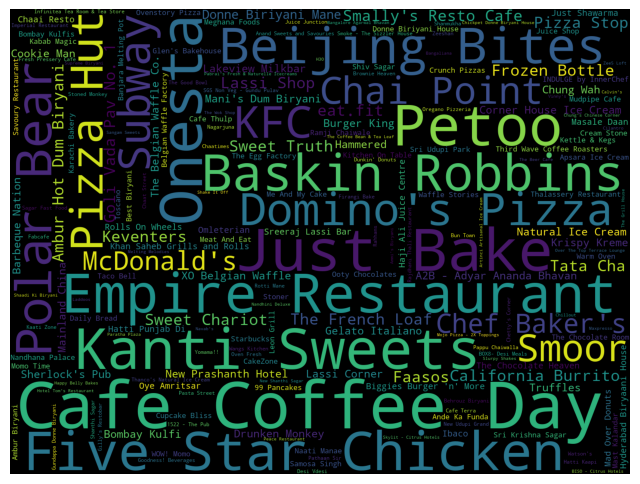

In [60]:
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df['name'].value_counts()))


fig = plt.figure(1,figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

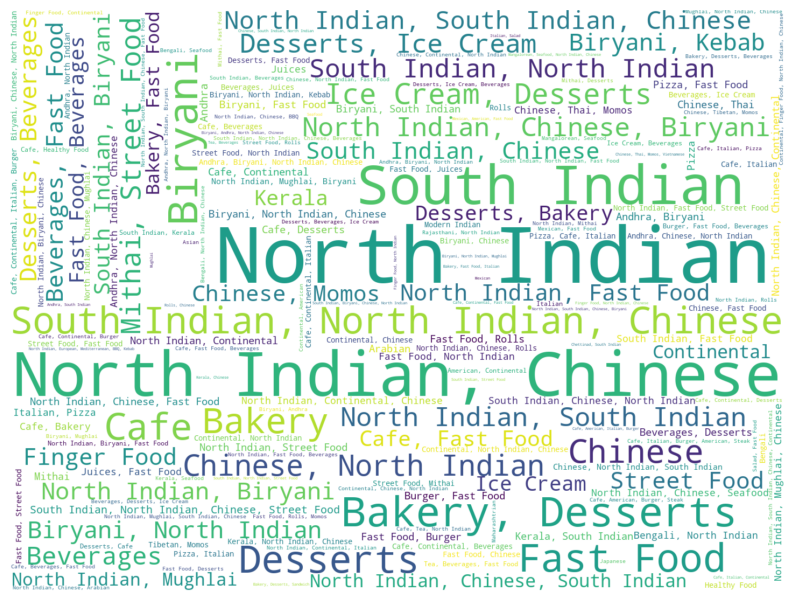

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1440, height=1080, relative_scaling=0.5, background_color='white', colormap='viridis').generate_from_frequencies(df['cuisines'].value_counts())

fig = plt.figure(1, figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Banglore is located in south india , but most prefered cuisine is  'North Indian' 

## Pie Charts

### book_table

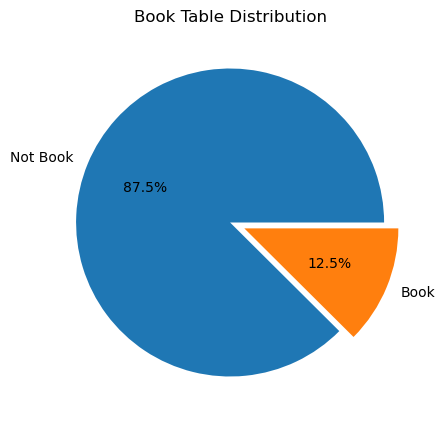

In [62]:
# Assuming x and labels are defined
x = df['book_table'].value_counts()
labels = ['Not Book', 'Book']

# Set the figure size
plt.figure(figsize=(5, 5))  # Adjust the values according to your preference

# Create the pie chart
plt.pie(x, explode=[0.0, 0.1], autopct='%1.1f%%', labels=labels)

# Set the title of the plot
plt.title('Book Table Distribution')

# Show the plot
plt.show()

### online_order

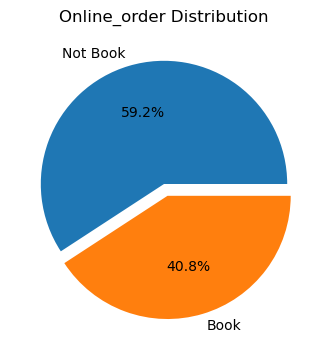

In [63]:
# Assuming x and labels are defined
x = df['online_order'].value_counts()
labels = ['Not Book', 'Book']

# Set the figure size
plt.figure(figsize=(4, 4))  # Adjust the values according to your preference

# Create the pie chart
plt.pie(x, explode=[0.0, 0.1], autopct='%1.1f%%', labels=labels)

# Set the title of the plot
plt.title('Online_order Distribution')

# Show the plot
plt.show()

## Bar Charts

### dish_liked

In [64]:
df['dish_liked'].value_counts()
#large difference in count of the dishes
#Therefore assigning dishes whose count less than 30 to a seperate group "other"

dish_liked
Biryani                                                                                                        22355
Chicken Biryani                                                                                                   57
Waffles                                                                                                           55
Masala Dosa                                                                                                       50
Friendly Staff                                                                                                    49
                                                                                                               ...  
Tacos, Nachos, Pizza, Mexican Fries                                                                                1
Panna Cotta, Pasta, Steak, Lamb Chops, Chocolate Tart, Chocolate Mousse, Fish                                      1
Butter Chicken, Pasta, Gulab Jamun, Rolls, Fruit Cust

In [65]:
dish_liked_counts = df['dish_liked'].value_counts()

# Find values with counts less than 30
values_to_merge = dish_liked_counts[dish_liked_counts <= 30].index

# Replace those values with 'Other' in the original DataFrame
df['dish_liked'].replace(values_to_merge, 'Other', inplace=True)



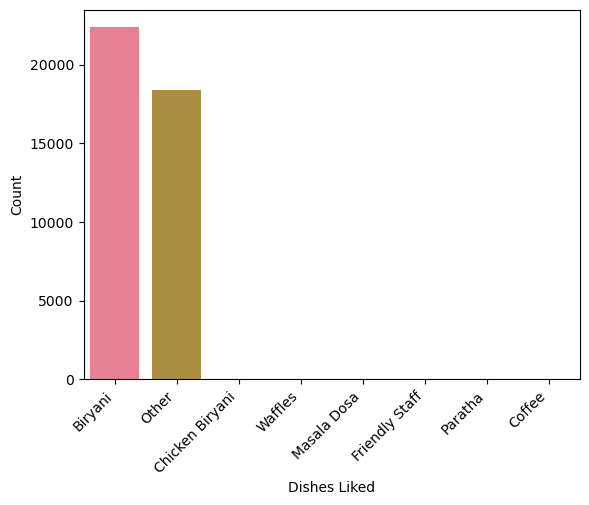

In [66]:
dff = pd.DataFrame(df['dish_liked'].value_counts().reset_index())
custom_palette = sns.color_palette("husl")
# Create the bar plot
sns.barplot(x='dish_liked', y='count', data=dff, palette=custom_palette)

# Set axis labels
plt.xlabel('Dishes Liked')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### rest_type

In [67]:
df['rest_type'].value_counts()
#large difference in count of the rest types
#Therefore assigning rest types whose count less than 300 to a seperate group "other"

rest_type
Quick Bites                   15357
Casual Dining                  8258
Cafe                           2940
Delivery                       2048
Dessert Parlor                 1801
                              ...  
Pop Up                            2
Dessert Parlor, Kiosk             1
Quick Bites, Kiosk                1
Cafe, Food Court                  1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [68]:
rest_type_counts = df['rest_type'].value_counts()

# Find values with counts less than 300
values_to_merge = rest_type_counts[rest_type_counts <= 300].index

# Replace those values with 'Other' in the original DataFrame
df['rest_type'].replace(values_to_merge, 'Other', inplace=True)

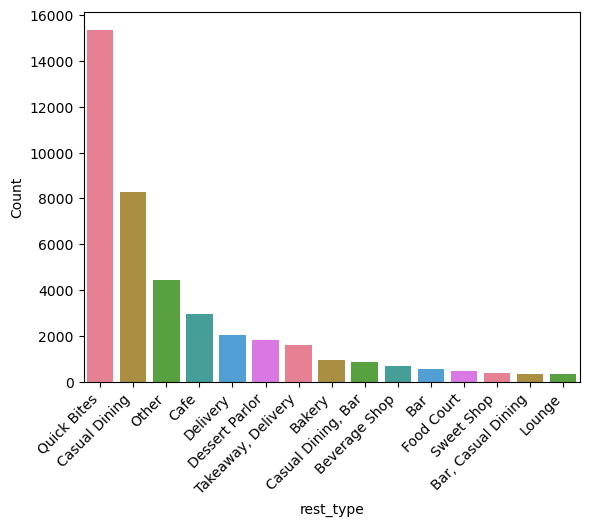

In [69]:
dff = pd.DataFrame(df['rest_type'].value_counts().reset_index())
custom_palette = sns.color_palette("husl")
# Create the bar plot
sns.barplot(x='rest_type', y='count', data=dff, palette=custom_palette)

# Set axis labels
plt.xlabel('rest_type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### listed_in(type)

In [70]:
df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              20565
Dine-out              14147
Desserts               2872
Cafes                  1347
Drinks & nightlife      851
Buffet                  694
Pubs and bars           533
Name: count, dtype: int64

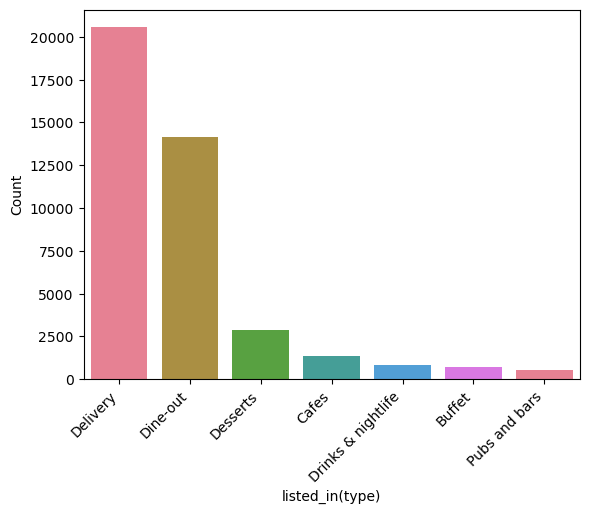

In [71]:
dff = pd.DataFrame(df['listed_in(type)'].value_counts().reset_index())
custom_palette = sns.color_palette("husl")
# Create the bar plot
sns.barplot(x='listed_in(type)', y='count', data=dff, palette=custom_palette)

# Set axis labels
plt.xlabel('listed_in(type)')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### listed_in(city)

In [72]:
df['listed_in(city)'].value_counts()

listed_in(city)
BTM                      2637
Koramangala 7th Block    2370
Koramangala 5th Block    2225
Koramangala 4th Block    2189
Koramangala 6th Block    2080
Jayanagar                1890
JP Nagar                 1645
Indiranagar              1473
Church Street            1427
MG Road                  1419
Brigade Road             1414
Lavelle Road             1380
HSR                      1377
Bannerghatta Road        1323
Marathahalli             1304
Residency Road           1265
Whitefield               1259
Brookefield              1212
Old Airport Road         1108
Kammanahalli             1064
Basavanagudi             1048
Kalyan Nagar             1014
Sarjapur Road            1012
Electronic City           997
Bellandur                 966
Frazer Town               930
Malleshwaram              877
Rajajinagar               857
Banashankari              661
New BEL Road              586
Name: count, dtype: int64

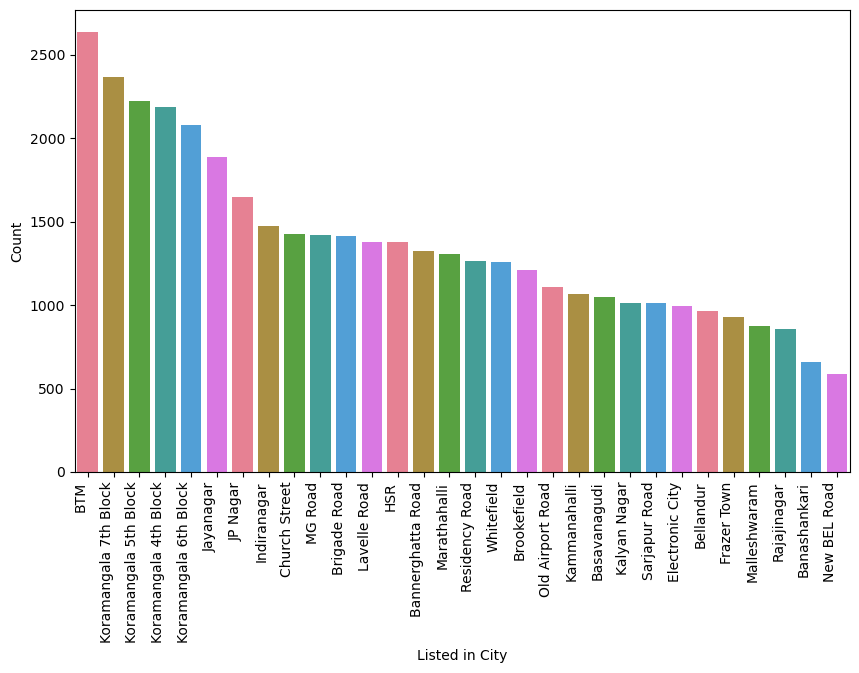

In [73]:
# Create a DataFrame for the counts
dff = pd.DataFrame(df['listed_in(city)'].value_counts().reset_index())

# Custom palette
custom_palette = sns.color_palette("husl")

# Set the figsize parameter
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='listed_in(city)', y='count', data=dff, palette=custom_palette)

# Set axis labels
plt.xlabel('Listed in City')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

# Multivariate Analysis

### Lets take the rating of restaurant and find the average rating for each of the neighborhood

In [74]:
df5 = pd.DataFrame(df.groupby(['location'])['rate'].mean().sort_values()[-10:])
df5.sort_values(by="rate",ascending=False)


,rate
location,
Lavelle Road,4.109685
St. Marks Road,4.000714
Koramangala 3rd Block,3.989024
Church Street,3.988767
Koramangala 5th Block,3.979084
Sankey Road,3.953846
Cunningham Road,3.893264
Koramangala 4th Block,3.874105
Sadashiv Nagar,3.868000


* Clearly Lavelle Road restaurants are rated higher 

### Neighborhood by cost of food

In [75]:
df['location'].value_counts()

location
BTM                      4072
Koramangala 5th Block    2008
HSR                      1999
JP Nagar                 1777
Whitefield               1676
                         ... 
West Bangalore              4
Yelahanka                   4
Jakkur                      3
Peenya                      1
Rajarajeshwari Nagar        1
Name: count, Length: 93, dtype: int64

In [76]:
# Get the locations with counts greater than 500
locations_above_50 = df['location'].value_counts()[df['location'].value_counts() > 500].index.tolist()

# Filter the DataFrame based on the selected locations
above_50 = df[df['location'].isin(locations_above_50)]

# mean approx_cost(for two people) over the location
pd.DataFrame(above_50.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False))

,approx_cost(for two people)
location,
MG Road,1136.671368
Residency Road,960.966543
Ulsoor,764.987406
Richmond Road,742.129630
Koramangala 4th Block,700.298329
Koramangala 5th Block,663.545817
Indiranagar,653.316923
Brigade Road,651.840491
Koramangala 6th Block,619.733925


* Cost of living in Lavelle Road is also quite high

### Rating and Cuisines

In [77]:
df6 = pd.DataFrame(df.groupby(['cuisines'])['rate'].mean().sort_values()[-10:])
df6.sort_values(by="rate",ascending= False)

,rate
cuisines,
"Asian, Chinese, Thai, Momos",4.900000
"Healthy Food, Salad, Mediterranean",4.900000
"Continental, North Indian, Italian, South Indian, Finger Food",4.900000
"Asian, Mediterranean, North Indian, BBQ",4.850000
"North Indian, European, Mediterranean, BBQ",4.800000
"European, Mediterranean, North Indian, BBQ",4.782353
"American, Tex-Mex, Burger, BBQ, Mexican",4.766667
"BBQ, North Indian, Continental, Chinese",4.700000
"Chinese, American, Continental, Italian, North Indian",4.700000


* Healthy Food, Salad, Mediterranean has the highest rating among the cuisines 

## Relationship of Cost with Numerical Variables 

In [78]:
numerical_features

Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')

### With Rate

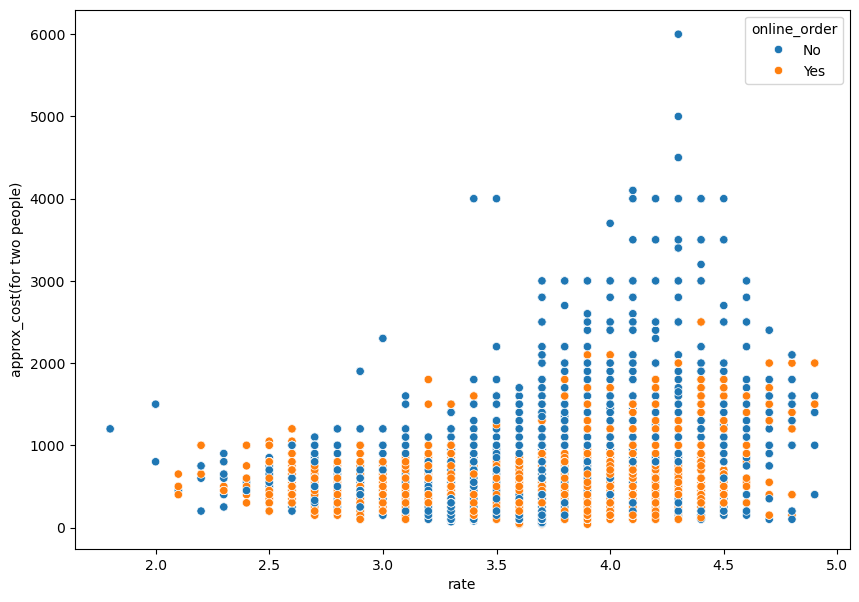

In [79]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

* From this scattterplot,we can come up with a conclusion that most of the highest rated accepts online order and they are in budget too

### With Votes

<Axes: xlabel='votes', ylabel='approx_cost(for two people)'>

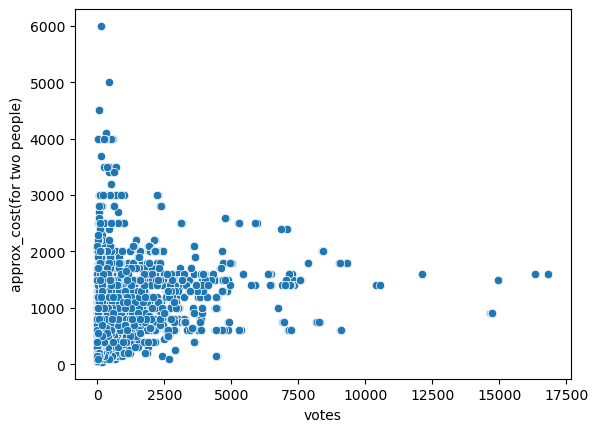

In [80]:
sns.scatterplot(x='votes', y='approx_cost(for two people)', data=df)

#  Relationship of cost with categorical  variables 

###  Cost vs Type 

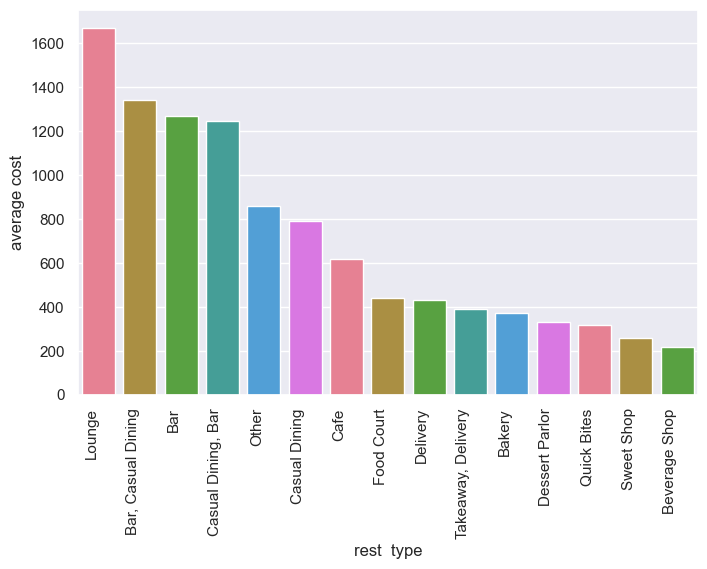

In [81]:
ddd = pd.DataFrame(df.groupby(['rest_type'])['approx_cost(for two people)'].mean()).reset_index()
ddd.columns = ['rest  type','average cost']
ddd_sorted = ddd.sort_values(by='average cost', ascending=False)

custom_palette = sns.color_palette("husl")
# Create the bar plot
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='rest  type', y='average cost', data=ddd_sorted.iloc[0:30], palette=custom_palette)

# Set axis labels
plt.xlabel('rest  type')
plt.ylabel('average cost')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

###  Cost vs Cuisines

In [82]:
df['cuisines'].value_counts()
#large difference in count of the cuisines
#Therefore assigning cusines whose count less than 100 to a seperate group "other"

cuisines
North Indian                                         2332
North Indian, Chinese                                1887
South Indian                                         1430
Bakery, Desserts                                      730
Biryani                                               727
                                                     ... 
Fast Food, Coffee                                       1
Continental, Desserts, Italian, Japanese, Mexican       1
North Indian, Mughlai, Chinese, Kebab, Biryani          1
Turkish, Fast Food, Biryani, Chinese                    1
Salad, Fast Food, Sandwich, Healthy Food                1
Name: count, Length: 2645, dtype: int64

In [83]:
# Assuming df is your DataFrame
cuisines_type_counts = df['cuisines'].value_counts()

# Find values with counts less than 1
values_to_merge = cuisines_type_counts[cuisines_type_counts <= 100].index

# Replace those values with 'Other' in the original DataFrame
df['cuisines'].replace(values_to_merge, 'Other', inplace=True)

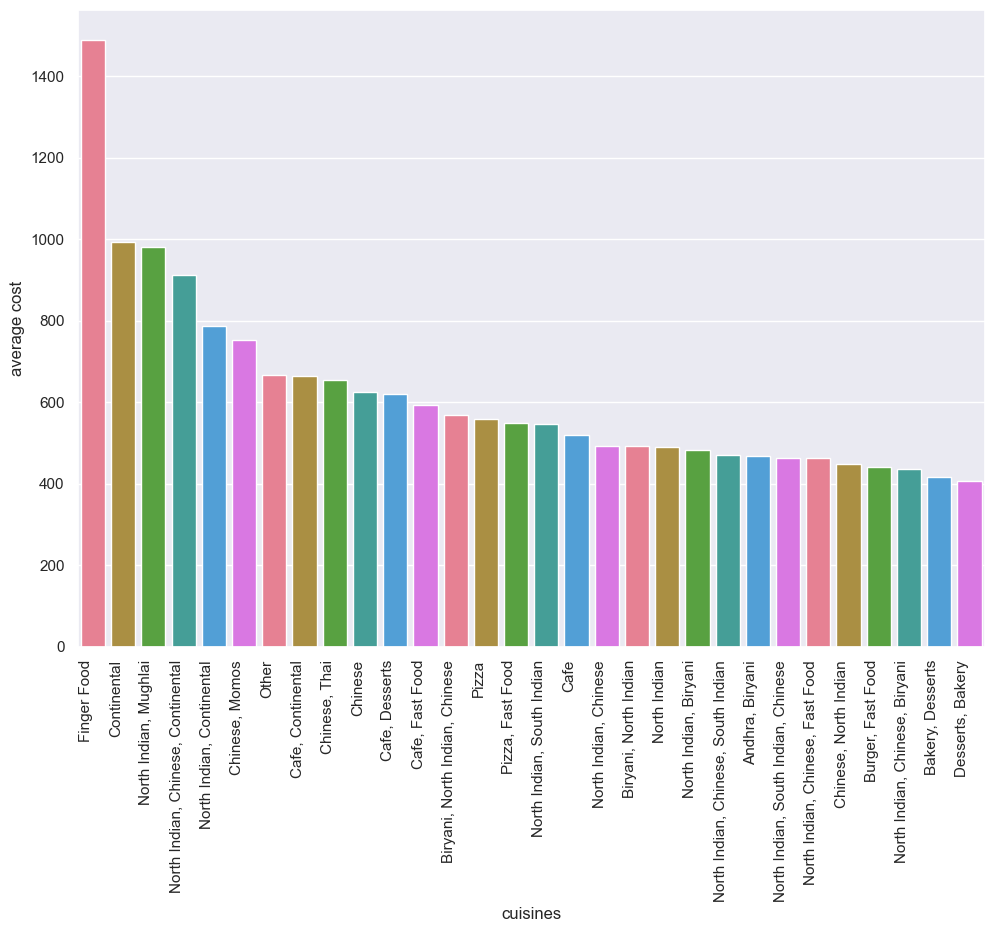

In [84]:
ddd = pd.DataFrame(df.groupby(['cuisines'])['approx_cost(for two people)'].mean()).reset_index()
ddd.columns = ['cuisines','average cost']
ddd_sorted = ddd.sort_values(by='average cost', ascending=False)

custom_palette = sns.color_palette("husl")
# Create the bar plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='cuisines', y='average cost', data=ddd_sorted.iloc[0:30], palette=custom_palette)

# Set axis labels
plt.xlabel('cuisines')
plt.ylabel('average cost')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

### Cost vs Location

In [85]:
df['location'].value_counts()
#large difference in count of the locations
#Therefore assigning locations whose count less than 300 to a seperate group "other"

location
BTM                      4072
Koramangala 5th Block    2008
HSR                      1999
JP Nagar                 1777
Whitefield               1676
                         ... 
West Bangalore              4
Yelahanka                   4
Jakkur                      3
Peenya                      1
Rajarajeshwari Nagar        1
Name: count, Length: 93, dtype: int64

In [86]:
location_type_counts = df['location'].value_counts()

# Find values with counts less than 1
values_to_merge = location_type_counts[location_type_counts <= 300].index

# Replace those values with 'Other' in the original DataFrame
df['location'].replace(values_to_merge, 'Other', inplace=True)

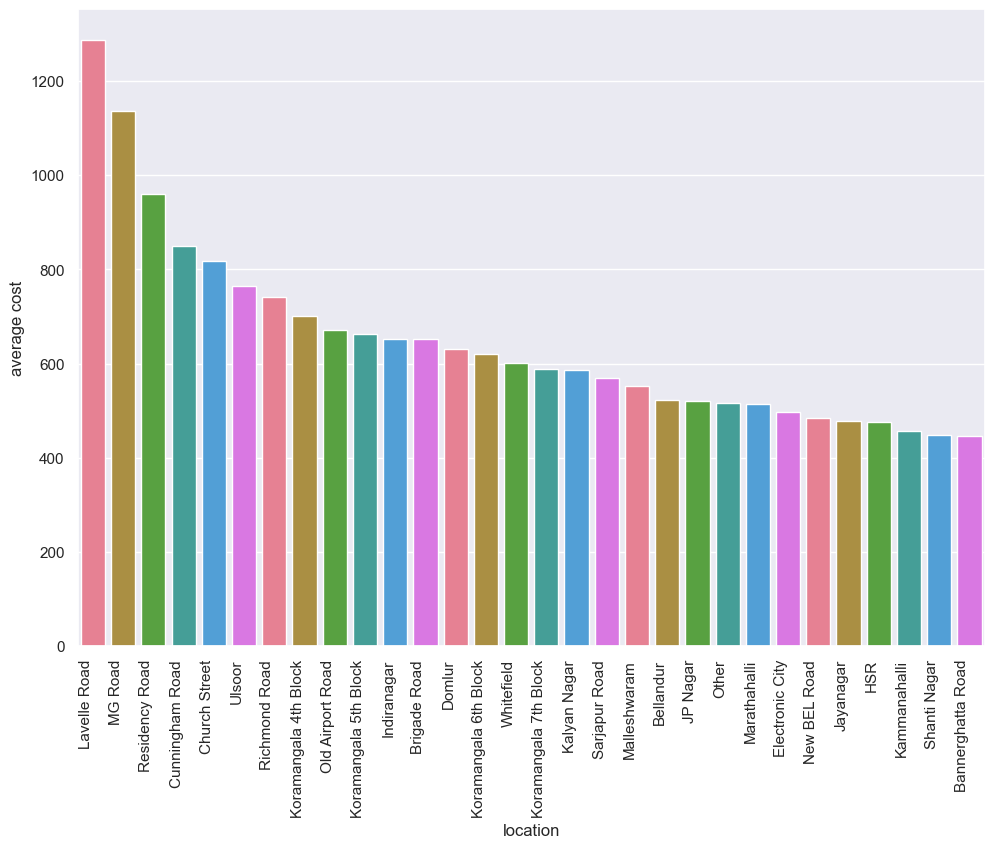

In [87]:
ddd = pd.DataFrame(df.groupby(['location'])['approx_cost(for two people)'].mean()).reset_index()
ddd.columns = ['location','average cost']
ddd_sorted = ddd.sort_values(by='average cost', ascending=False)

custom_palette = sns.color_palette("husl")
# Create the bar plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='location', y='average cost', data=ddd_sorted.iloc[0:30], palette=custom_palette)

# Set axis labels
plt.xlabel('location')
plt.ylabel('average cost')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

###  cost vs book_table

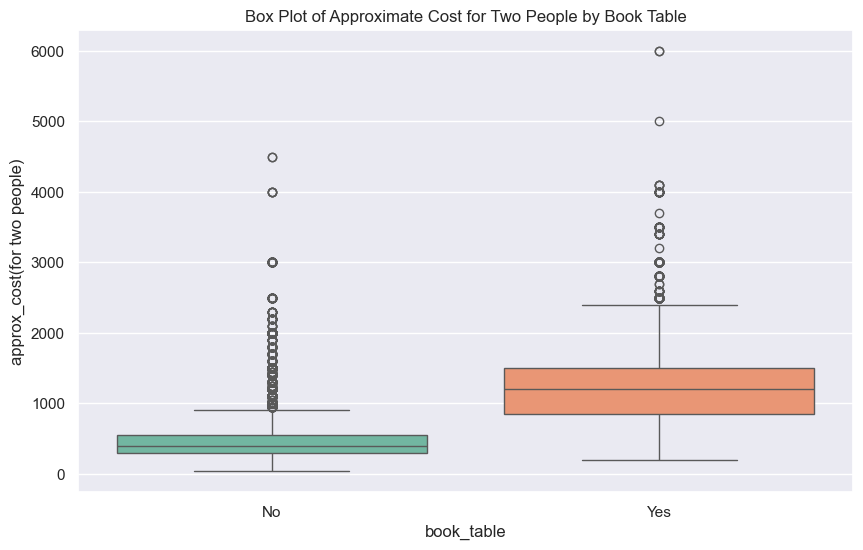

In [88]:
# Custom palette
custom_palette = sns.color_palette("Set2")

# Create a DataFrame with the required columns
data_for_boxplot = df[['book_table', 'approx_cost(for two people)']]

# Create a box plot with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='book_table', y='approx_cost(for two people)', data=data_for_boxplot, palette=custom_palette)
plt.title('Box Plot of Approximate Cost for Two People by Book Table')
plt.show()

###  cost vs online_order

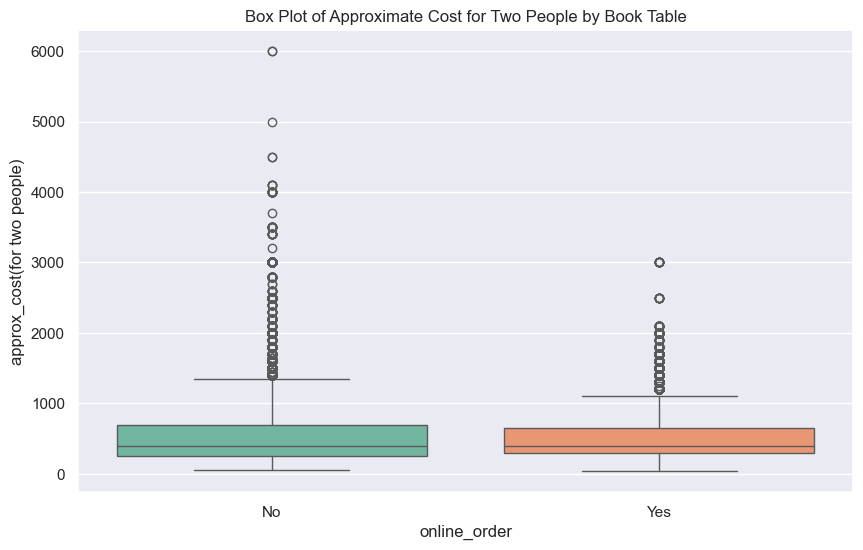

In [89]:
# Custom palette
custom_palette = sns.color_palette("Set2")

# Create a DataFrame with the required columns
data_for_boxplot = df[['online_order', 'approx_cost(for two people)']]

# Create a box plot with custom palette
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='approx_cost(for two people)', data=data_for_boxplot, palette=custom_palette)
plt.title('Box Plot of Approximate Cost for Two People by Book Table')
plt.show()

###  Restaurants that have better rating >4 and that are under budget too

In [90]:
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].shape[0]

3265

### Total such various affordable hotels at different location

In [91]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]

In [92]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
    
    

In [93]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)
location_df.sort_values(by="restaurant",ascending=False)

,restaurant
location,
Other,96
HSR,57
Jayanagar,57
Indiranagar,57
BTM,52
Koramangala 5th Block,52
Malleshwaram,38
JP Nagar,36
Marathahalli,32


### Finding Best budget Restaurants in any location

In [94]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [95]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Swad Punjab Da', "Muthashy's", 'Chaatimes',
       'Litti Twist', 'Yum In My Tum', 'The Shawarma Shop', 'Gorbandh',
       "Domino's Pizza", 'Andhra Kitchen', 'Roti Wala'], dtype=object)

### visulaize online order with location wise

In [96]:
df3=df.groupby(["location","online_order"])["name"].count()
df3.to_csv("location_online.csv")
df3=pd.read_csv("location_online.csv")
df3=pd.pivot_table(df3,values=None,index=["location"],columns=["online_order"],fill_value=0,aggfunc=np.sum)
df3

name      
online_order             No   Yes
location                         
BTM                    1416  2656
Banashankari            312   395
Banaswadi               254   266
Bannerghatta Road       550   755
Basavanagudi            200   353
Bellandur               396   618
Brigade Road            452   526
Brookefield             193   338
Church Street           182   272
Cunningham Road         135   251
Domlur                  204   189
Ejipura                 177   188
Electronic City         562   458
Frazer Town             229   337
HSR                     469  1530
Indiranagar             567  1058
JP Nagar                716  1061
Jayanagar               457  1110
Kalyan Nagar            276   390
Kammanahalli            215   309
Koramangala 1st Block   302   677
Koramangala 4th Block   380   458
Koramangala 5th Block   715  1293
Koramangala 6th Block   350   552
Koramangala 7th Block   308   624
Lavelle Road            241   172
MG Road                 413   296
Malleshwaram            263   329
Marathahalli            570   885
New BEL Road            209   294
Old Airport Road        177   154
Other                  1990  2556
Rajajinagar             223   237
Residency Road          338   200
Richmond Road           441   207
Sarjapur Road           260   592
Shanti Nagar            233   182
Shivajinagar            280   116
Ulsoor                  295   499
Whitefield              781   895

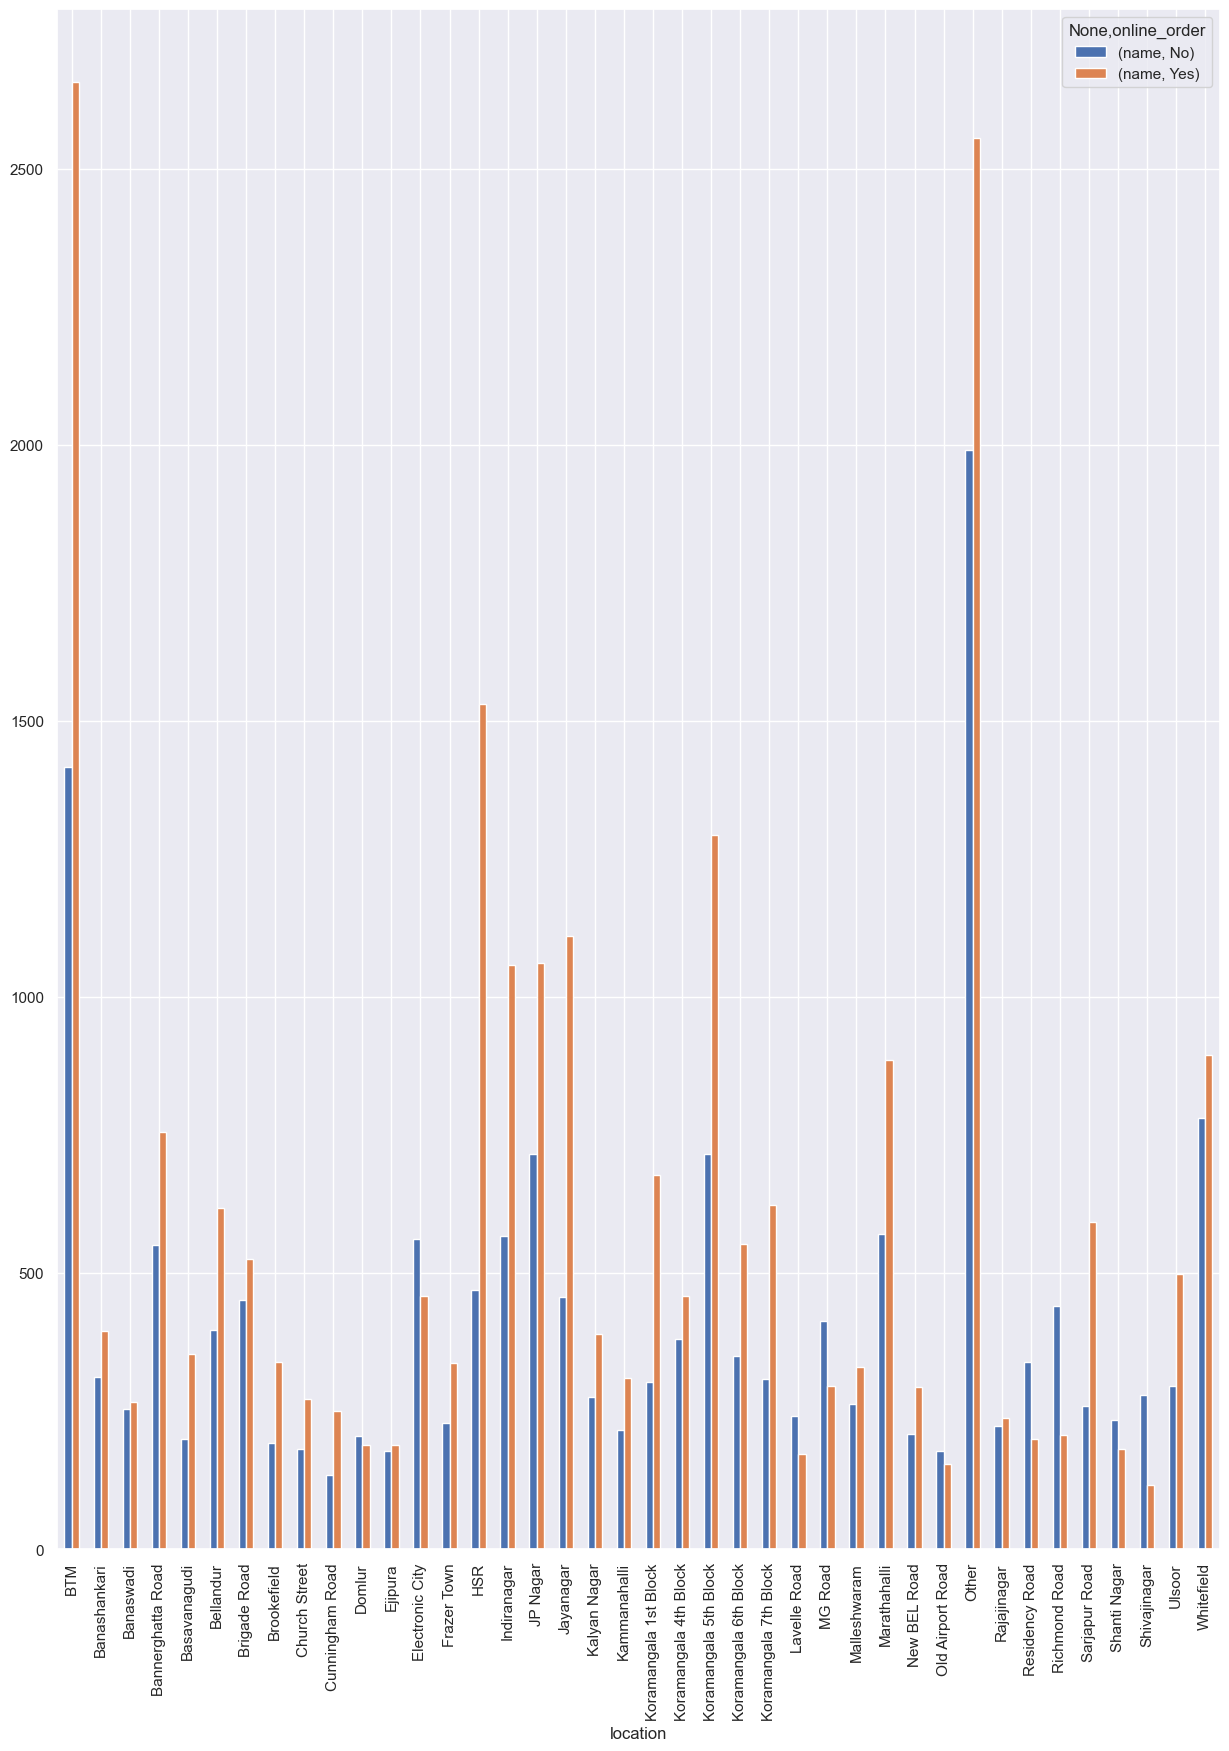

In [97]:
df3.plot(kind="bar",figsize=(15,20))
plt.show()